In [1]:
# Importing the data
import pandas as pd
df = pd.read_csv("EastWestAirlines.csv")
df

,Unnamed: 0,Bonus_miles,ID#,clust,cc1_miles,cc2_miles,cc3_miles
0,0,174,1,1,1,1,1
1,1,215,2,1,1,1,1
2,2,4123,3,1,1,1,1
3,3,500,4,1,1,1,1
4,4,43300,5,3,4,1,1
...,...,...,...,...,...,...,...
3966,3966,37840,3989,3,4,1,1
3967,3967,10599,3990,1,2,1,1
3968,3968,3200,3991,1,1,1,1
3969,3969,2069,3992,1,1,1,1


In [2]:
df.shape
df.head()
df.dtypes

Unnamed: 0     int64
Bonus_miles    int64
ID#            int64
clust          int64
cc1_miles      int64
cc2_miles      int64
cc3_miles      int64
dtype: object

# drop the variable

In [3]:
df1=df.drop(["ID#"],axis=1)
df1

,Unnamed: 0,Bonus_miles,clust,cc1_miles,cc2_miles,cc3_miles
0,0,174,1,1,1,1
1,1,215,1,1,1,1
2,2,4123,1,1,1,1
3,3,500,1,1,1,1
4,4,43300,3,4,1,1
...,...,...,...,...,...,...
3966,3966,37840,3,4,1,1
3967,3967,10599,1,2,1,1
3968,3968,3200,1,1,1,1
3969,3969,2069,1,1,1,1


Noramlize the numeric data

In [4]:
from sklearn.preprocessing import normalize
df1_norm=pd.DataFrame(normalize(df1),columns=df1.columns)
df1_norm

,Unnamed: 0,Bonus_miles,clust,cc1_miles,cc2_miles,cc3_miles
0,0.000000,0.999934,0.005747,0.005747,0.005747,0.005747
1,0.004651,0.999946,0.004651,0.004651,0.004651,0.004651
2,0.000485,1.000000,0.000243,0.000243,0.000243,0.000243
3,0.006000,0.999974,0.002000,0.002000,0.002000,0.002000
4,0.000092,1.000000,0.000069,0.000092,0.000023,0.000023
...,...,...,...,...,...,...
3966,0.104239,0.994552,0.000079,0.000105,0.000026,0.000026
3967,0.350533,0.936550,0.000088,0.000177,0.000088,0.000088
3968,0.778413,0.627752,0.000196,0.000196,0.000196,0.000196
3969,0.886748,0.462253,0.000223,0.000223,0.000223,0.000223


Create dendograms

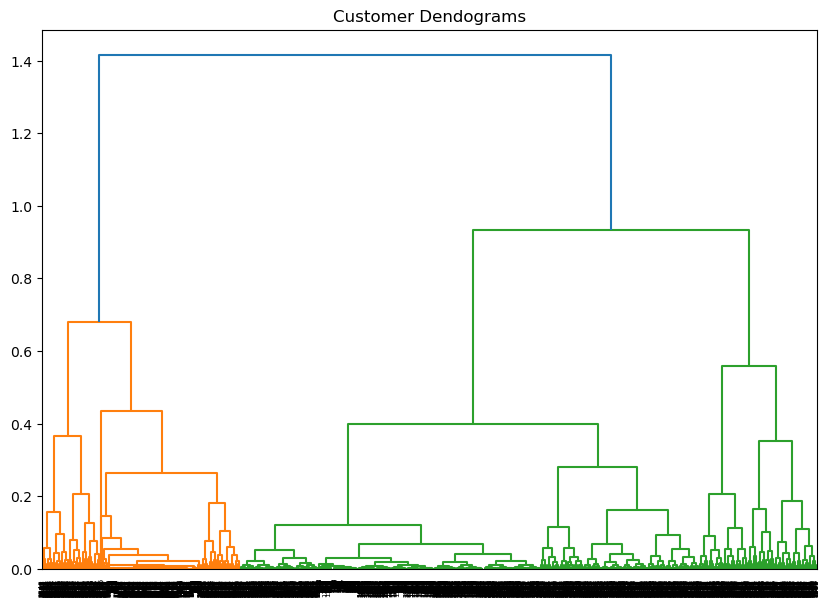

In [5]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))  
plt.title("Customer Dendograms")  
dend = shc.dendrogram(shc.linkage(df1_norm, method='complete')) 

#__Create Clustering__

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='complete')
Y = cluster.fit_predict(df1_norm)
Y

array([6, 6, 6, ..., 1, 0, 0], dtype=int64)

In [10]:
Y = pd.DataFrame(Y)
Y[0].value_counts()

6    1538
3     818
2     711
1     350
0     303
4     250
5       1
Name: 0, dtype: int64

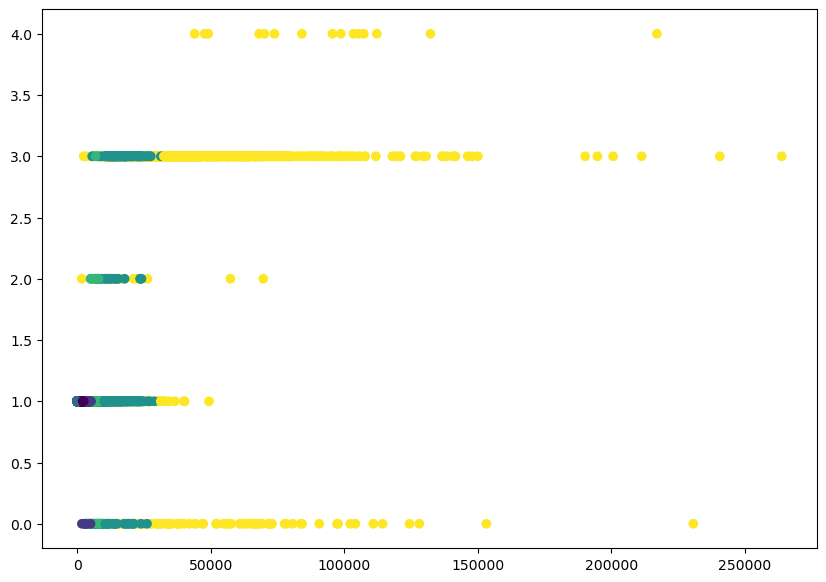

In [13]:
plt.figure(figsize=(10, 7))  
plt.scatter(df1['Bonus_miles'],df1['clust'], c=cluster.labels_)    

K-Means clustering

In [14]:
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=5,n_init=20)
Kmeans.fit(df1_norm)
Y = Kmeans.predict(df1_norm)

In [15]:
Y = pd.DataFrame(Y)
Y[0].value_counts()

0    1855
1     738
4     621
2     401
3     356
Name: 0, dtype: int64

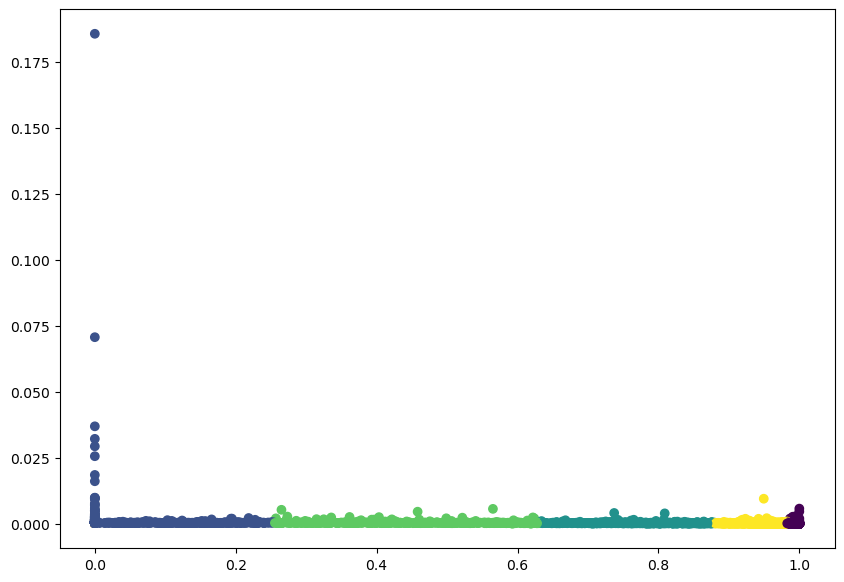

In [17]:
plt.figure(figsize=(10, 7))  
plt.scatter(df1_norm['Bonus_miles'],df1_norm['clust'],c=Kmeans.labels_,)  

In [18]:
Kmeans.inertia_    

23.53986616573208

In [19]:
# Getting the cluster centers
C = Kmeans.cluster_centers_

In [20]:
l1 = []
for i in range(1,11):
    Kmeans = KMeans(n_clusters=i,n_init=20)
    Kmeans.fit(df1_norm)
    l1.append(Kmeans.inertia_)

In [21]:
print(l1)

[1139.375972851366, 186.1729846240492, 71.08788417471615, 39.73794772283307, 23.53980989773355, 16.905636561578824, 12.035535767701962, 9.292227089228362, 7.022845050313527, 5.557899113894058]


In [22]:
pd.DataFrame(range(1,11))        
pd.DataFrame(l1)

,0
0,1139.375973
1,186.172985
2,71.087884
3,39.737948
4,23.539810
5,16.905637
6,12.035536
7,9.292227
8,7.022845
9,5.557899


In [23]:
pd.concat([pd.DataFrame(range(1,11)),pd.DataFrame(l1)], axis=1)

,0,0
0,1,1139.375973
1,2,186.172985
2,3,71.087884
3,4,39.737948
4,5,23.539810
5,6,16.905637
6,7,12.035536
7,8,9.292227
8,9,7.022845
9,10,5.557899


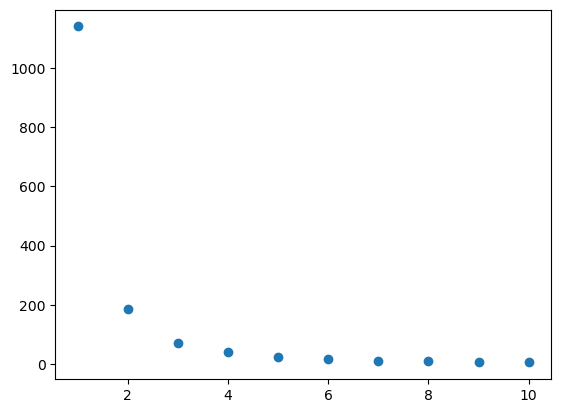

In [24]:
import matplotlib.pyplot as plt
plt.scatter(range(1,11),l1)
plt.show()

In [25]:
# DBSCAN Clustering
from sklearn.cluster import DBSCAN

In [26]:
df = df.iloc[:,1:11]
df.values

array([[ 174,    1,    1,    1,    1,    1],
       [ 215,    2,    1,    1,    1,    1],
       [4123,    3,    1,    1,    1,    1],
       ...,
       [3200, 3991,    1,    1,    1,    1],
       [2069, 3992,    1,    1,    1,    1],
       [2500, 3993,    1,    1,    1,    1]], dtype=int64)

In [27]:
# Normalize heterogenous numerical data using standard scalar fit transform to dataset
from sklearn.preprocessing import StandardScaler
SS = StandardScaler().fit(df.values)
x = SS.transform(df.values)

In [28]:
DBS = DBSCAN(eps=2,min_samples=4)
DBS.fit(x)

DBSCAN(eps=2, min_samples=4)

In [29]:
# Noisy samples are given the label -1.
DBS.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
# Adding clusters to dataset
c1 = pd.DataFrame(DBS.labels_,columns=['cluster'])
c1

,cluster
0,0
1,0
2,0
3,0
4,1
...,...
3966,1
3967,0
3968,0
3969,0


In [31]:
pd.concat([df,c1],axis=1)

,Bonus_miles,ID#,clust,cc1_miles,cc2_miles,cc3_miles,cluster
0,174,1,1,1,1,1,0
1,215,2,1,1,1,1,0
2,4123,3,1,1,1,1,0
3,500,4,1,1,1,1,0
4,43300,5,3,4,1,1,1
...,...,...,...,...,...,...,...
3966,37840,3989,3,4,1,1,1
3967,10599,3990,1,2,1,1,0
3968,3200,3991,1,1,1,1,0
3969,2069,3992,1,1,1,1,0
